In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import scipy.optimize
import scipy.spatial
from IPython import display
from ipywidgets import interact ,widgets
import scipy.stats as stats
import math
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:
data = fetch_openml(name='phoneme', version=1)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [5]:
X=data.data
y=data.target

In [6]:
len(X)

5404

In [7]:
X_train1,X_test1,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [8]:
X_train=scaler.fit(X_train1).transform(X_train1)
X_test=scaler.fit(X_test1).transform(X_test1)

# DECISION TREE #

In [9]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [10]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
model.score(X_test,y_test)

0.7542561065877128

In [12]:
y_predicted=model.predict(X_test)

In [14]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of logistic regression classifier for phoneme dataset')

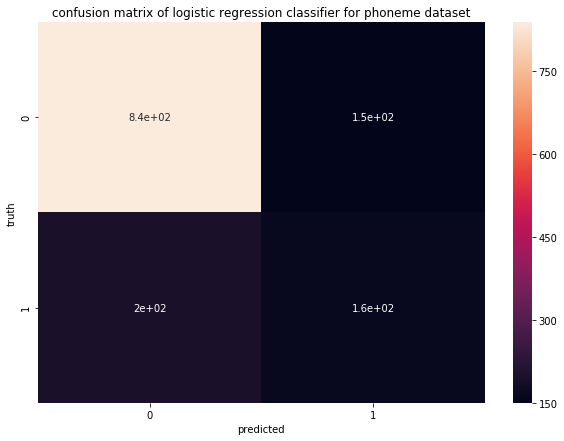

In [26]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of logistic regression classifier for phoneme dataset")

In [27]:
FP1 = cm.sum(axis=0) - np.diag(cm)  
FN1 = cm.sum(axis=1) - np.diag(cm)
TP1 = np.diag(cm)
TN1 = cm.sum() - (FP1 + FN1 + TP1)

# Sensitivity, hit rate, recall, or true positive rate
TPR1 = TP1/(TP1+FN1)
# Specificity or true negative rate
TNR1 = TN1/(TN1+FP1) 
# Precision or positive predictive value
PPV1 = TP1/(TP1+FP1)
# Negative predictive value
NPV1 = TN1/(TN1+FN1)
# Fall out or false positive rate
FPR1 = FP1/(FP1+TN1)
# False negative rate
FNR1 = FN1/(TP1+FN1)
# False discovery rate
FDR1 = FP1/(TP1+FP1)

# Overall accuracy
ACC = (TP1+TN1)/(TP1+FP1+FN1+TN1)
print(FP1,FN1,TP1,TN1)

[198 150] [150 198] [839 164] [164 839]


# ROC CURVE #

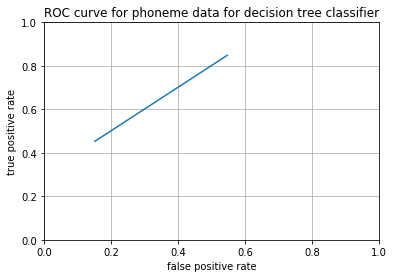

In [28]:
plt.plot(FPR1,TPR1)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for phoneme data for decision tree classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

Text(0.5, 1.0, 'confusion matrix of decision tree classifier for phoneme classifier')

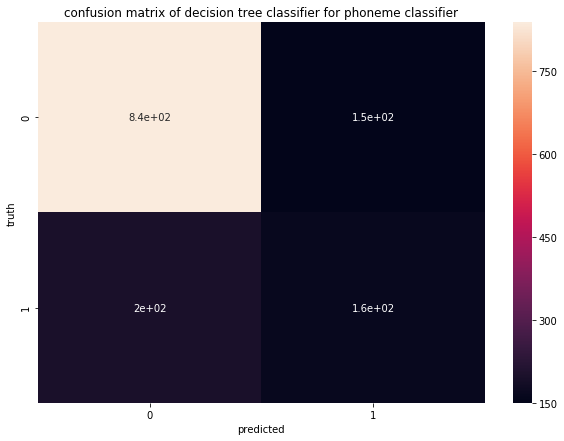

In [29]:

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of decision tree classifier for phoneme classifier")
 

In [30]:
d11=pd.DataFrame(FP1,columns=['decisiontreefp'])
d12=pd.DataFrame(TP1,columns=['decisiontreetp'])
d13=pd.DataFrame(y_predicted,columns=['prd1'])
d14=pd.DataFrame(TN1,columns=['decisiontreetn'])
d15=pd.DataFrame(TPR1,columns=['decisiontreettpr'])
d16=pd.DataFrame(TNR1,columns=['decisiontreetnr'])
d17=pd.DataFrame(PPV1,columns=['decisiontreeppv'])
d18=pd.DataFrame(NPV1,columns=['decisiontreenpv'])

# LOGISTIC REGRESSION #

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [32]:
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
lr.score(X_test,y_test)

0.7424130273871207

In [34]:
y_predicted=lr.predict(X_test)

In [35]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of logistic regression classifier for phoneme classifier')

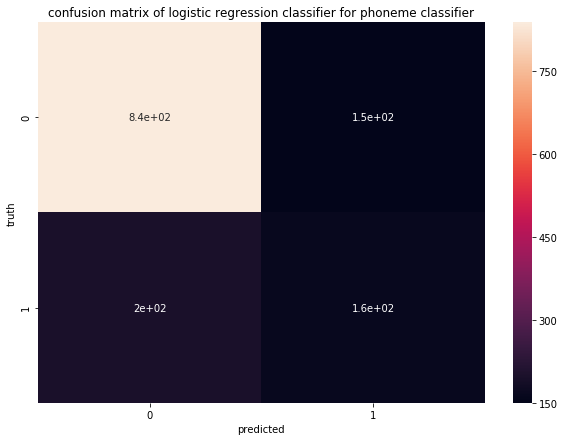

In [36]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of logistic regression classifier for phoneme classifier")

In [37]:
FP2 = cm.sum(axis=0) - np.diag(cm)  
FN2 = cm.sum(axis=1) - np.diag(cm)
TP2 = np.diag(cm)
TN2 = cm.sum() - (FP2 + FN2 + TP2)

# Sensitivity, hit rate, recall, or true positive rate
TPR2 = TP2/(TP2+FN2)
# Specificity or true negative rate
TNR2 = TN2/(TN2+FP2) 
# Precision or positive predictive value
PPV2 = TP2/(TP2+FP2)
# Negative predictive value
NPV2 = TN2/(TN2+FN2)
# Fall out or false positive rate
FPR2 = FP2/(FP2+TN2)
# False negative rate
FNR2 = FN2/(TP2+FN2)
# False discovery rate
FDR2 = FP2/(TP2+FP2)

# Overall accuracy
ACC = (TP2+TN2)/(TP2+FP2+FN2+TN2)
print(FP2,FN2,TP2,TN2)

[198 150] [150 198] [839 164] [164 839]


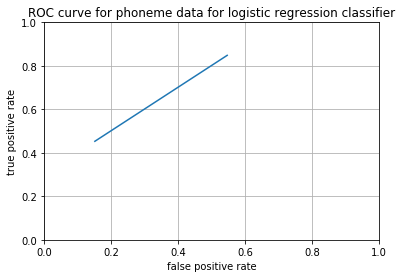

In [38]:
plt.plot(FPR2,TPR2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for phoneme data for logistic regression classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [39]:
d01=pd.DataFrame(FP2,columns=['logisticregfp'])

In [40]:
d02=pd.DataFrame(TP2,columns=['logisticregtp'])
d03=pd.DataFrame(y_predicted,columns=['prd2'])
d04=pd.DataFrame(TN2,columns=['logisticregtn'])
d05=pd.DataFrame(TPR2,columns=['logisticregtpr'])
d06=pd.DataFrame(TNR2,columns=['logisticregtnr'])
d07=pd.DataFrame(PPV2,columns=['logisticregppv'])
d08=pd.DataFrame(NPV2,columns=['logisticregnpv'])

# KNN #

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn=KNeighborsClassifier(n_neighbors=15)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [44]:
knn.score(X_test,y_test)

0.846780162842339

In [45]:
y_predicted=knn.predict(X_test)

In [46]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of KNN classifier for phoneme classifier')

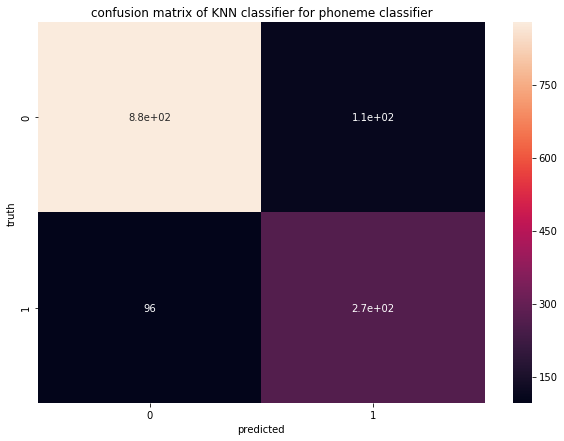

In [47]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of KNN classifier for phoneme classifier")

In [48]:
FP3 = cm.sum(axis=0) - np.diag(cm)  
FN3 = cm.sum(axis=1) - np.diag(cm)
TP3 = np.diag(cm)
TN3 = cm.sum() - (FP3 + FN3 + TP3)

# Sensitivity, hit rate, recall, or true positive rate
TPR3 = TP3/(TP3+FN3)
# Specificity or true negative rate
TNR3 = TN3/(TN3+FP3) 
# Precision or positive predictive value
PPV3 = TP3/(TP3+FP3)
# Negative predictive value
NPV3 = TN3/(TN3+FN3)
# Fall out or false positive rate
FPR3 = FP3/(FP3+TN3)
# False negative rate
FNR3 = FN3/(TP3+FN3)
# False discovery rate
FDR3 = FP3/(TP3+FP3)

# Overall accuracy
ACC = (TP3+TN3)/(TP3+FP3+FN3+TN3)
print(FP3,FN3,TP3,TN3)
print(TPR3,TNR3,PPV3,NPV3)

[ 96 111] [111  96] [878 266] [266 878]
[0.88776542 0.73480663] [0.73480663 0.88776542] [0.90143737 0.70557029] [0.70557029 0.90143737]


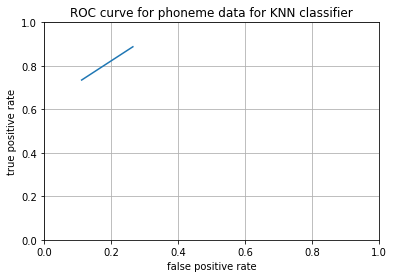

In [49]:
plt.plot(FPR3,TPR3)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for phoneme data for KNN classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [50]:
d21=pd.DataFrame(FP3,columns=['knnfp'])

In [51]:
d22=pd.DataFrame(TP3,columns=['knntp'])
d23=pd.DataFrame(y_predicted,columns=['prd3'])
d24=pd.DataFrame(TN3,columns=['knntn'])
d25=pd.DataFrame(TPR3,columns=['knntpr'])
d26=pd.DataFrame(TNR3,columns=['knntnr'])
d27=pd.DataFrame(PPV3,columns=['knnppv'])
d28=pd.DataFrame(NPV3,columns=['knnnpv'])

# RANDOM FOREST #

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model=RandomForestClassifier(n_estimators=100)

In [54]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
y_predicted=model.predict(X_test)

In [56]:
model.score(X_test,y_test)

0.9000740192450037

In [57]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of random forest classifier for phoneme classifier')

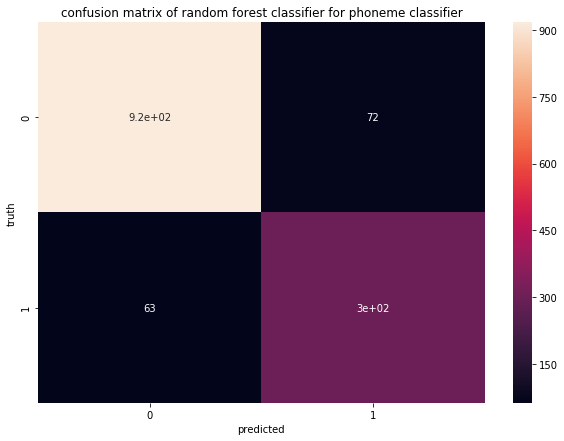

In [58]:
 import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of random forest classifier for phoneme classifier")

In [59]:
FP4 = cm.sum(axis=0) - np.diag(cm)  
FN4 = cm.sum(axis=1) - np.diag(cm)
TP4 = np.diag(cm)
TN4 = cm.sum() - (FP4 + FN4 + TP4)

# Sensitivity, hit rate, recall, or true positive rate
TPR4 = TP4/(TP4+FN4)
# Specificity or true negative rate
TNR4 = TN4/(TN4+FP4) 
# Precision or positive predictive value
PPV4 = TP4/(TP4+FP4)
# Negative predictive value
NPV4 = TN4/(TN4+FN4)
# Fall out or false positive rate
FPR4 = FP4/(FP4+TN4)
# False negative rate
FNR4 = FN4/(TP4+FN4)
# False discovery rate
FDR4 = FP4/(TP4+FP4)

# Overall accuracy
ACC = (TP4+TN4)/(TP4+FP4+FN4+TN4)
print(FP4,FN4,TP4,TN4)

[63 72] [72 63] [917 299] [299 917]


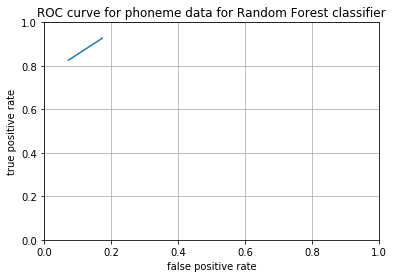

In [60]:
plt.plot(FPR4,TPR4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for phoneme data for Random Forest classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [61]:
d31=pd.DataFrame(FP4,columns=['rffp'])

In [62]:
d32=pd.DataFrame(TP4,columns=['rftp'])
d33=pd.DataFrame(y_predicted,columns=['prd4'])
d34=pd.DataFrame(TN4,columns=['rftn'])
d35=pd.DataFrame(TPR4,columns=['rftpr'])
d36=pd.DataFrame(TNR4,columns=['rftnr'])
d37=pd.DataFrame(PPV4,columns=['rfppv'])
d38=pd.DataFrame(NPV4,columns=['rfnpv'])

# MLP #

In [63]:
from sklearn.neural_network import MLPClassifier

In [64]:
mlp=MLPClassifier(max_iter=1500,random_state=300)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=300, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
mlp.score(X_test,y_test)

0.850481125092524

In [66]:
y_predicted=mlp.predict(X_test)

In [67]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of MLP classifier for phoneme classifier')

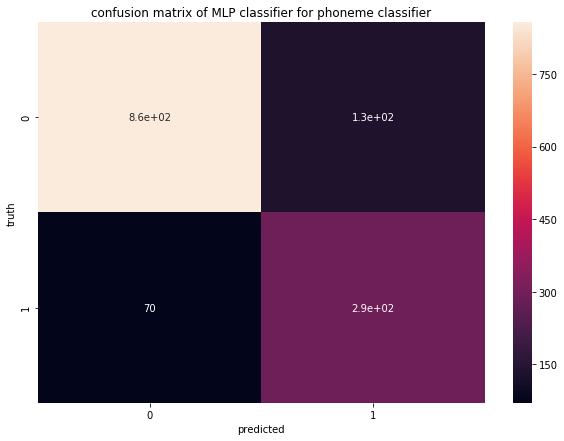

In [68]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of MLP classifier for phoneme classifier")

In [69]:
FP5 = cm.sum(axis=0) - np.diag(cm)  
FN5 = cm.sum(axis=1) - np.diag(cm)
TP5 = np.diag(cm)
TN5 = cm.sum() - (FP5 + FN5 + TP5)

# Sensitivity, hit rate, recall, or true positive rate
TPR5 = TP5/(TP5+FN5)
# Specificity or true negative rate
TNR5 = TN5/(TN5+FP5) 
# Precision or positive predictive value
PPV5 = TP5/(TP5+FP5)
# Negative predictive value
NPV5 = TN5/(TN5+FN5)
# Fall out or false positive rate
FPR5 = FP5/(FP5+TN5)
# False negative rate
FNR5 = FN5/(TP5+FN5)
# False discovery rate
FDR5 = FP5/(TP5+FP5)

# Overall accuracy
ACC = (TP5+TN5)/(TP5+FP5+FN5+TN5)
print(FP5,FN5,TP5,TN5)
print(TPR5,TNR5,PPV5,NPV5)

[ 70 132] [132  70] [857 292] [292 857]
[0.86653185 0.80662983] [0.80662983 0.86653185] [0.92448759 0.68867925] [0.68867925 0.92448759]


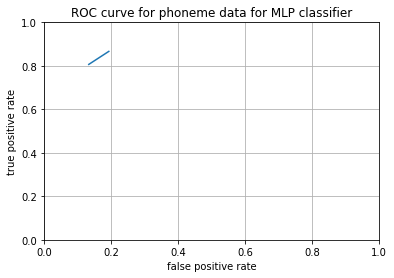

In [70]:
plt.plot(FPR5,TPR5)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for phoneme data for MLP classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [71]:
d51=pd.DataFrame(FP5,columns=['mlpfp'])
d52=pd.DataFrame(TP5,columns=['mlptp'])
d53=pd.DataFrame(y_predicted,columns=['prd5'])
d54=pd.DataFrame(TN5,columns=['mlptn'])
d55=pd.DataFrame(TPR5,columns=['mlptpr'])
d56=pd.DataFrame(TNR5,columns=['mlptnr'])
d57=pd.DataFrame(PPV5,columns=['mlpppv'])
d58=pd.DataFrame(NPV5,columns=['mlpnpv'])

# NAIVE BAYES #

In [76]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [77]:
bnb=BernoulliNB(binarize=0.1)
bnb.fit(X_train,y_train)
bnb.score(X_test,y_test)

0.7668393782383419

In [78]:
y_predicted=bnb.predict(X_test)

In [79]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of Naive-Bayes(Barnouli) classifier for phoneme classifier')

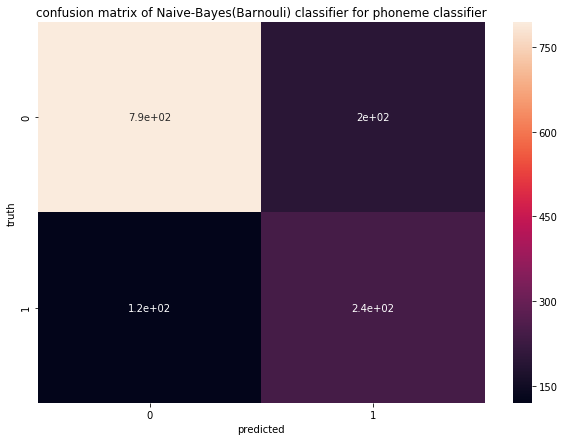

In [80]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of Naive-Bayes(Barnouli) classifier for phoneme classifier")

In [83]:
FP6 = cm.sum(axis=0) - np.diag(cm)  
FN6 = cm.sum(axis=1) - np.diag(cm)
TP6 = np.diag(cm)
TN6 = cm.sum() - (FP6 + FN6+ TP6)

# Sensitivity, hit rate, recall, or true positive rate
TPR6 = TP6/(TP6+FN6)
# Specificity or true negative rate
TNR6 = TN6/(TN6+FP6) 
# Precision or positive predictive value
PPV6 = TP6/(TP6+FP6)
# Negative predictive value
NPV6 = TN6/(TN6+FN6)
# Fall out or false positive rate
FPR6 = FP6/(FP6+TN6)
# False negative rate
FNR6 = FN6/(TP6+FN6)
# False discovery rate
FDR6 = FP6/(TP6+FP6)

# Overall accuracy
ACC = (TP6+TN6)/(TP6+FP6+FN6+TN6)
print(FP6,FN6,TP6,TN6)

[120 195] [195 120] [794 242] [242 794]


In [84]:
d61=pd.DataFrame(FP6,columns=['bnbfp'])
d62=pd.DataFrame(TP6,columns=['bnbtp'])
d63=pd.DataFrame(y_predicted,columns=['prd6'])
d64=pd.DataFrame(TN6,columns=['bnbtn'])
d65=pd.DataFrame(TPR6,columns=['bnbtpr'])
d66=pd.DataFrame(TNR6,columns=['bnbtnr'])
d67=pd.DataFrame(PPV6,columns=['bnbppv'])
d68=pd.DataFrame(NPV6,columns=['bnbnpv'])

In [85]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.7350111028867505

In [86]:
y_predicted=gnb.predict(X_test)

In [87]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of Naive-Bayes(Gaussian) classifier for phoneme classifier')

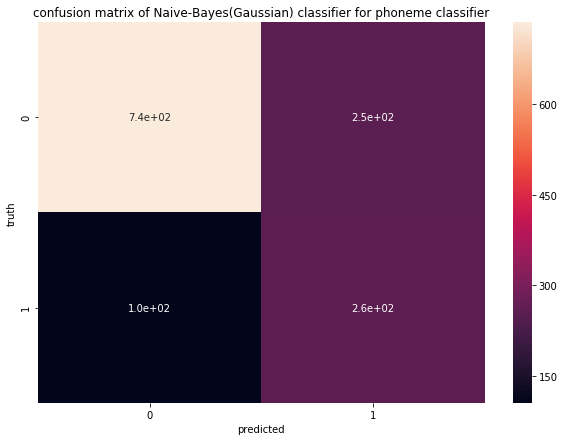

In [88]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of Naive-Bayes(Gaussian) classifier for phoneme classifier")

In [177]:
FP7 = cm.sum(axis=0) - np.diag(cm)  
FN7 = cm.sum(axis=1) - np.diag(cm)
TP7 = np.diag(cm)
TN7 = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR7 = TP/(TP+FN)
# Specificity or true negative rate
TNR7 = TN/(TN+FP) 
# Precision or positive predictive value
PPV7 = TP/(TP+FP)
# Negative predictive value
NPV7 = TN/(TN+FN)
# Fall out or false positive rate
FPR7 = FP/(FP+TN)
# False negative rate
FNR7 = FN/(TP+FN)
# False discovery rate
FDR7 = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[105  91] [ 91 105] [857 298] [298 857]


In [178]:
d81=pd.DataFrame(FP7,columns=['gnbfp'])
d82=pd.DataFrame(TP7,columns=['gnbtp'])
d83=pd.DataFrame(y_predicted,columns=['prd7'])
d84=pd.DataFrame(TN7,columns=['gnbtn'])
d85=pd.DataFrame(TPR7,columns=['gnbtpr'])
d86=pd.DataFrame(TNR7,columns=['gnbtnr'])
d87=pd.DataFrame(PPV7,columns=['gnbppv'])
d88=pd.DataFrame(NPV7,columns=['gnbnpv'])

# SVM #

In [89]:
from sklearn.svm import SVC

In [90]:
model=SVC(gamma='scale')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
y_predicted=model.predict(X_test)

In [92]:
model.score(X_test,y_test)

0.8267949666913398

In [93]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of SVM classifier for phoneme classifier')

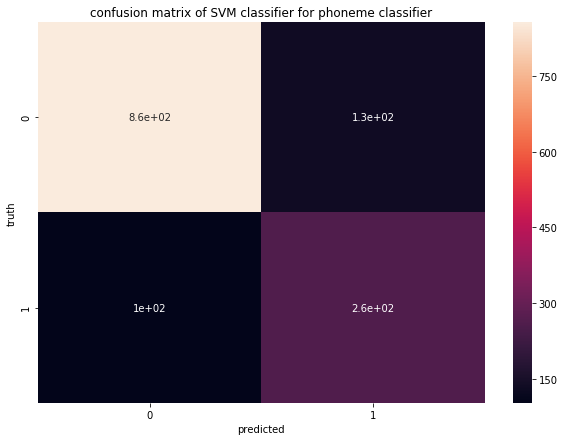

In [94]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of SVM classifier for phoneme classifier")

In [95]:
FP8 = cm.sum(axis=0) - np.diag(cm)  
FN8 = cm.sum(axis=1) - np.diag(cm)
TP8 = np.diag(cm)
TN8 = cm.sum() - (FP8 + FN8 + TP8)

# Sensitivity, hit rate, recall, or true positive rate
TPR8 = TP8/(TP8+FN8)
# Specificity or true negative rate
TNR8 = TN8/(TN8+FP8) 
# Precision or positive predictive value
PPV8 = TP8/(TP8+FP8)
# Negative predictive value
NPV8 = TN8/(TN8+FN8)
# Fall out or false positive rate
FPR8 = FP8/(FP8+TN8)
# False negative rate
FNR8 = FN8/(TP8+FN8)
# False discovery rate
FDR8 = FP8/(TP8+FP8)

# Overall accuracy
ACC = (TP8+TN8)/(TP8+FP8+FN8+TN8)
print(FP8,FN8,TP8,TN8)
print(TPR8,TNR8,PPV8,NPV8)
print(ACC)

[102 132] [132 102] [857 260] [260 857]
[0.86653185 0.71823204] [0.71823204 0.86653185] [0.89363921 0.66326531] [0.66326531 0.89363921]
[0.82679497 0.82679497]


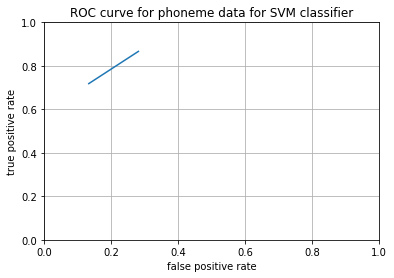

In [97]:
plt.plot(FPR8,TPR8)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for phoneme data for SVM classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [98]:
d41=pd.DataFrame(FP8,columns=['svmfp'])
d42=pd.DataFrame(TP8,columns=['svmtp'])
d43=pd.DataFrame(y_predicted,columns=['prd8'])
d44=pd.DataFrame(TN8,columns=['svmtn'])
d45=pd.DataFrame(TPR8,columns=['svmtpr'])
d46=pd.DataFrame(TNR8,columns=['svmtnr'])
d47=pd.DataFrame(PPV8,columns=['svmppv'])
d48=pd.DataFrame(NPV8,columns=['svmnpv'])

In [99]:
M1=[]
for i in range(0,2):
    M1.append(TP5[i]-TP8[i])
print(M1)

[0, 32]


In [100]:
d=pd.DataFrame(M1,columns=['tp'])

# ONE_SAMPLE_T_TEST #

In [101]:
from scipy.stats import ttest_1samp

In [102]:
tset, pval = ttest_1samp(d['tp'], 0)

In [103]:
pval

0.49999999999999956

In [104]:
M1=[]
for i in range(0,2):
    M1.append(TN5[i]-TN8[i])
print(M1)

[32, 0]


In [105]:
d=pd.DataFrame(M1,columns=['tn'])

In [106]:
d=pd.DataFrame(M1,columns=['tn'])

In [107]:
pval

0.49999999999999956

In [108]:
M1=[]
for i in range(0,2):
    M1.append(TPR5[i]-TPR8[i])
print(M1)

[0.0, 0.08839779005524862]


In [109]:
d=pd.DataFrame(M1,columns=['tn'])

In [110]:
tset, pval = ttest_1samp(d['tn'], 0)

In [111]:
pval

0.49999999999999956

In [112]:
M1=[]
for i in range(0,2):
    M1.append(TNR5[i]-TNR8[i])
print(M1)

[0.08839779005524862, 0.0]


In [113]:
tset, pval = ttest_1samp(d['tn'], 0)

In [114]:
pval

0.49999999999999956

In [115]:
M1=[]
for i in range(0,2):
    M1.append(PPV5[i]-PPV8[i])
print(M1)

[0.03084838688268632, 0.025413939160569887]


In [116]:
tset, pval = ttest_1samp(d['tn'], 0)

In [117]:
pval

0.49999999999999956

In [118]:
M1=[]
for i in range(0,2):
    M1.append(NPV5[i]-NPV8[i])
print(M1)

[0.025413939160569887, 0.03084838688268632]


In [119]:
tset, pval = ttest_1samp(d['tn'], 0)

In [120]:
pval

0.49999999999999956

# TWO-SAMPLE-T-TEST #

In [121]:
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests

In [122]:
ttest,pval = ttest_ind(d42['svmtp'],d52['mlptp'])
print("p-value",pval)

p-value 0.9724821347972037


In [123]:
ttest,pval = ttest_ind(d44['svmtn'],d54['mlptn'])
print("p-value",pval)

p-value 0.9724821347972037


In [124]:
ttest,pval = ttest_ind(d45['svmtpr'],d55['mlptpr'])
print("p-value",pval)

p-value 0.6359990569116472


In [125]:
ttest,pval = ttest_ind(d46['svmtnr'],d56['mlptnr'])
print("p-value",pval)

p-value 0.6359990569116472


In [126]:
ttest,pval = ttest_ind(d47['svmppv'],d57['mlpppv'])
print("p-value",pval)

p-value 0.8801900653216848


In [127]:
ttest,pval = ttest_ind(d48['svmnpv'],d58['mlpnpv'])
print("p-value",pval)

p-value 0.8801900653216848


In [128]:
contingency_table=pd.crosstab(d43["prd8"],d53["prd5"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 prd5    1    2
prd8          
1     891   68
2      36  356


Text(0.5, 1.0, 'contingency matrix for phoneme classifier')

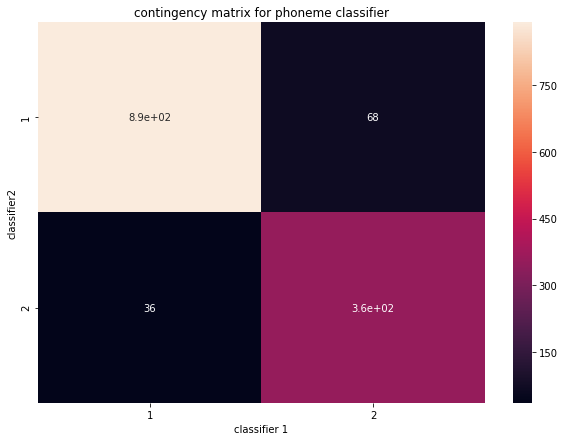

In [130]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(contingency_table,annot=True)
plt.xlabel("classifier 1")
plt.ylabel("classifier2")
plt.title("contingency matrix for phoneme classifier")

# FISHER-EXACT-TEST #

In [131]:
oddsratio, pvalue = stats.fisher_exact(contingency_table)

In [132]:
print(pvalue,oddsratio)

9.667167560607544e-208 129.5735294117647


# ANOVA-TEST #

In [133]:
F, p = stats.f_oneway(d22['knntp'],d42['svmtp'],d52['mlptp'])


In [134]:
p

0.9991540736141192

In [135]:
F, p = stats.f_oneway(d24['knntn'],d44['svmtn'],d54['mlptn'])

In [136]:
p

0.9991540736141192

In [137]:
F, p = stats.f_oneway(d25['knntpr'],d45['svmtpr'],d55['mlptpr'])

In [138]:
p

0.8905656492496763

In [139]:
F, p = stats.f_oneway(d26['knntnr'],d46['svmtnr'],d56['mlptnr'])

In [140]:
p

0.8905656492496763

In [141]:
F, p = stats.f_oneway(d27['knnppv'],d47['svmppv'],d57['mlpppv'])

In [142]:
p

0.9808809952115431

In [143]:
F, p = stats.f_oneway(d28['knnnpv'],d48['svmnpv'],d58['mlpnpv'])

In [144]:
p

0.9808809952115431

# BARTLETT'S-TEST #

In [145]:
t,p=scipy.stats.bartlett(d22['knntp'],d42['svmtp'],d52['mlptp'])
print('p value',p)

p value 0.9977098505728637


In [146]:
t,p=scipy.stats.bartlett(d24['knntn'],d44['svmtn'],d54['mlptn'])
print('p value',p)

p value 0.9977098505728637


In [147]:
t,p=scipy.stats.bartlett(d25['knntpr'],d45['svmtpr'],d55['mlptpr'])
print('p value',p)

p value 0.7432289139778361


In [148]:
t,p=scipy.stats.bartlett(d27['knnppv'],d47['svmppv'],d55['mlptpr'])
print('p value',p)

p value 0.6011624850811867


# CHI-SQUARE-TEST #

In [149]:
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[891  68]
 [ 36 356]]


Text(0.5, 1.0, 'Observed_Values for phoneme classifier')

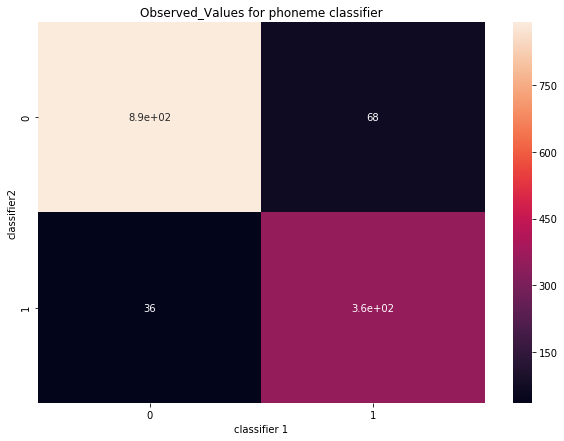

In [151]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(Observed_Values,annot=True)
plt.xlabel("classifier 1")
plt.ylabel("classifier2")
plt.title("Observed_Values for phoneme classifier")

In [152]:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[658.02590674 300.97409326]
 [268.97409326 123.02590674]]


Text(0.5, 1.0, 'Expected_Values for phoneme classifier')

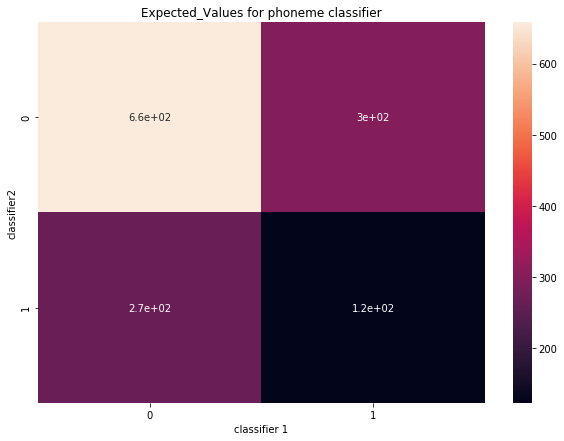

In [153]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(Expected_Values,annot=True)
plt.xlabel("classifier 1")
plt.ylabel("classifier2")
plt.title("Expected_Values for phoneme classifier")

In [154]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [155]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)

print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

chi-square statistic:- 905.7973429667477
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 905.7973429667477
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


# MANN-WHITNEY-TEST #

In [156]:
t,p= scipy.stats.mannwhitneyu(d42['svmtp'],d52['mlptp'], use_continuity=True)

In [157]:
p

0.5

In [158]:
t,p= scipy.stats.mannwhitneyu(d44['svmtn'],d54['mlptn'], use_continuity=True)

In [159]:
p

0.5

In [160]:
t,p= scipy.stats.mannwhitneyu(d45['svmtpr'],d55['mlptpr'], use_continuity=True)

In [161]:
p

0.5

In [162]:
t,p= scipy.stats.mannwhitneyu(d46['svmtnr'],d56['mlptnr'], use_continuity=True)

In [163]:
p

0.5

In [164]:
t,p= scipy.stats.mannwhitneyu(d47['svmppv'],d57['mlpppv'], use_continuity=True)

In [165]:
p

0.34926767915166934

# MEDIAN TEST #

In [166]:
from scipy.stats import median_test

In [167]:
stat, p, med, tbl = median_test(d22['knntp'],d42['svmtp'],d52['mlptp'])


In [168]:
p

1.0

In [169]:
stat, p, med, tbl = median_test(d24['knntn'],d44['svmtn'],d54['mlptn'])

In [170]:
p

1.0

# KOLMOGOROV-SMIRNOV-TEST #

In [171]:
from scipy.stats import ks_2samp

In [172]:
f,p=ks_2samp(d42['svmtp'],d52['mlptp'])

In [173]:
p

0.8438198245415606

In [174]:
f,p=ks_2samp(d44['svmtn'],d54['mlptn'])

In [175]:
p

0.8438198245415606

In [176]:
f,p=ks_2samp(d45['svmtpr'],d55['mlptpr'])

In [177]:
p

0.8438198245415606

In [178]:
f,p=ks_2samp(d46['svmtnr'],d56['mlptnr'])

In [179]:
p

0.8438198245415606

In [180]:
f,p=ks_2samp(d47['svmppv'],d57['mlpppv'])

In [181]:
p

0.8438198245415606

In [182]:
d=pd.read_csv("E:/d.csv")
d

,MLP,SVM
0,0.9985,0.9979
1,0.9977,0.9998
2,0.9983,0.9962
3,0.9977,0.9977
4,0.9975,0.9979
5,0.9964,0.9970
6,0.9974,0.9976
7,0.9970,0.9944
8,0.9989,0.9985
9,0.9970,0.9968


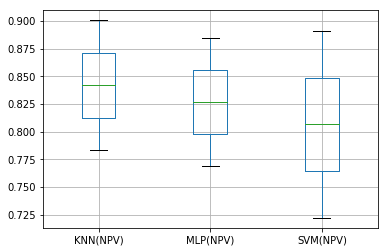

In [55]:
pd.DataFrame({'KNN(NPV)':d.KNN,'MLP(NPV)':d.MLP,'SVM(NPV)':d.SVM}).boxplot()